In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
Y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

params = {'n_estimators': 1000,
          'max_depth': 5,
          'loss': 'exponential', 'subsample': 0.2}

gbc = ensemble.GradientBoostingClassifier(**params)
gbc.fit(x_train, y_train)

y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

table_train = pd.crosstab(y_train, y_train_pred, margins=True)
table_test = pd.crosstab(y_test, y_test_pred, margins=True)
print(table_train)
train_t1_errors = table_train.loc[0.0,1.0]/table_train.loc['All', 'All']
train_t2_errors = table_train.loc[1.0,0.0]/table_train.loc['All', 'All']

test_t1_errors = table_test.loc[0.0,1.0]/table_test.loc['All', 'All']
test_t2_errors = table_test.loc[1.0,0.0]/table_test.loc['All', 'All']

print(train_t1_errors, train_t2_errors, test_t1_errors, test_t2_errors)

col_0     0.0   1.0   All
partner                  
0.0      3964    58  4022
1.0       273  2222  2495
All      4237  2280  6517
0.008899800521712445 0.04189044038668099 0.10736196319018405 0.17975460122699385


Text(0.5, 0, 'Relative Importance')

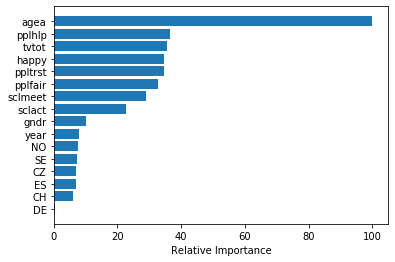

In [56]:
feature_importance = gbc.feature_importances_
feature_importance = 100*(feature_importance/feature_importance.max())
sort_index = np.argsort(feature_importance)
pos = np.arange(sort_index.shape[0])+ 0.5
plt.barh(pos, feature_importance[sort_index], align ='center')
plt.yticks(pos, X.columns[sort_index])
plt.xlabel('Relative Importance')

### after changing the parameters in the ensemble.GradientBoostingClassifier, the training data set prediction did increased, however the test data set not improve as significant as the training set.